In [8]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [9]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

# Start of DNN building

We will first create a DNN model on the easy dataset, analyse the results, and then create the DNN model on the hard dataset

## Easy Dataset (Distinct Job Categories)

In [10]:
is_working_with_easy_dataset = True

In [11]:
if is_working_with_easy_dataset:
    input_train_filename = "bag_easy_train.csv"
    input_test_filename = "bag_easy_test.csv"
else:
    input_train_filename = "bag_difficult_train.csv"
    input_test_filename = "bag_difficult_test.csv"

In [12]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [13]:
jd_train

,category,Human,’,Development,design,Work,Computer,creative,account,communication,...,Requirements,technical,Excellent,duty,market,knowledge,technology,business,application,matter
0,software+engineer,0.0,0.0,0.0,0.222604,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.281375,0.0,0.0,0.000000,0.000000,0.000000,0.198413,0.118790,0.000000
1,arts,0.0,0.0,0.0,0.102594,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.092776,0.000000,0.000000,0.000000,0.000000
2,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.069475,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.086890,0.122337
3,arts,0.0,0.0,0.0,0.393433,0.0,0.0,0.113493,0.000000,0.268595,...,0.0,0.000000,0.0,0.0,0.000000,0.071156,0.000000,0.000000,0.000000,0.000000
4,arts,0.0,0.0,0.0,0.206635,0.0,0.0,0.149018,0.000000,0.088168,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.118194,0.000000,0.000000,0.077626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,0.0,0.0,0.0,0.161678,0.0,0.0,0.000000,0.000000,0.045990,...,0.0,0.000000,0.0,0.0,0.000000,0.048735,0.184958,0.048036,0.230073,0.000000
3178,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.138805,0.096160,0.243296,0.000000,0.000000,0.000000
3179,arts,0.0,0.0,0.0,0.661753,0.0,0.0,0.286341,0.000000,0.056472,...,0.0,0.000000,0.0,0.0,0.000000,0.059842,0.000000,0.000000,0.070627,0.000000
3180,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.209857,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.195725


,category,Human,’,Development,design,Work,Computer,creative,account,communication,...,Requirements,technical,Excellent,duty,market,knowledge,technology,business,application,matter
0,software+engineer,0.0,0.0,0.0,0.222604,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.281375,0.0,0.0,0.000000,0.000000,0.000000,0.198413,0.118790,0.000000
1,arts,0.0,0.0,0.0,0.102594,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.092776,0.000000,0.000000,0.000000,0.000000
2,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.069475,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.086890,0.122337
3,arts,0.0,0.0,0.0,0.393433,0.0,0.0,0.113493,0.000000,0.268595,...,0.0,0.000000,0.0,0.0,0.000000,0.071156,0.000000,0.000000,0.000000,0.000000
4,arts,0.0,0.0,0.0,0.206635,0.0,0.0,0.149018,0.000000,0.088168,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.118194,0.000000,0.000000,0.077626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,0.0,0.0,0.0,0.161678,0.0,0.0,0.000000,0.000000,0.045990,...,0.0,0.000000,0.0,0.0,0.000000,0.048735,0.184958,0.048036,0.230073,0.000000
3178,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.138805,0.096160,0.243296,0.000000,0.000000,0.000000
3179,arts,0.0,0.0,0.0,0.661753,0.0,0.0,0.286341,0.000000,0.056472,...,0.0,0.000000,0.0,0.0,0.000000,0.059842,0.000000,0.000000,0.070627,0.000000
3180,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.209857,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.195725


In [14]:
jd_test

,category,Human,’,Development,design,Work,Computer,creative,account,communication,...,Requirements,technical,Excellent,duty,market,knowledge,technology,business,application,matter
0,software+engineer,0.0,0.0,0.0,0.504831,0.0,0.0,0.000000,0.000000,0.089474,...,0.0,0.000000,0.0,0.000000,0.000000,0.370597,0.000000,0.000000,0.000000,0.000000
1,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.284994,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.164661,0.000000,0.136495
2,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.071549,0.000000,0.083948,...,0.0,0.000000,0.0,0.000000,0.199817,0.043464,0.000000,0.089533,0.000000,0.000000
3,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.239945,0.129985,...,0.0,0.000000,0.0,0.210654,0.206265,0.000000,0.000000,0.277267,0.000000,0.000000
4,arts,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.366191,...,0.0,0.000000,0.0,0.000000,0.000000,0.068943,0.389033,0.071010,0.000000,0.058863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,0.0,0.0,0.0,0.096486,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.088538,0.111023,0.000000,0.000000,0.000000
792,software+engineer,0.0,0.0,0.0,0.274670,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.210175,0.0,0.000000,0.077249,0.050409,0.252843,0.259600,0.116410,0.000000
793,software+engineer,0.0,0.0,0.0,0.038540,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.122505,0.000000
794,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.180604,0.000000,0.000000,0.000000,0.000000,0.133245,0.000000


,category,Human,’,Development,design,Work,Computer,creative,account,communication,...,Requirements,technical,Excellent,duty,market,knowledge,technology,business,application,matter
0,software+engineer,0.0,0.0,0.0,0.504831,0.0,0.0,0.000000,0.000000,0.089474,...,0.0,0.000000,0.0,0.000000,0.000000,0.370597,0.000000,0.000000,0.000000,0.000000
1,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.284994,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.164661,0.000000,0.136495
2,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.071549,0.000000,0.083948,...,0.0,0.000000,0.0,0.000000,0.199817,0.043464,0.000000,0.089533,0.000000,0.000000
3,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.239945,0.129985,...,0.0,0.000000,0.0,0.210654,0.206265,0.000000,0.000000,0.277267,0.000000,0.000000
4,arts,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.366191,...,0.0,0.000000,0.0,0.000000,0.000000,0.068943,0.389033,0.071010,0.000000,0.058863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,0.0,0.0,0.0,0.096486,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.088538,0.111023,0.000000,0.000000,0.000000
792,software+engineer,0.0,0.0,0.0,0.274670,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.210175,0.0,0.000000,0.077249,0.050409,0.252843,0.259600,0.116410,0.000000
793,software+engineer,0.0,0.0,0.0,0.038540,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.122505,0.000000
794,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.180604,0.000000,0.000000,0.000000,0.000000,0.133245,0.000000


### Splitting Dataset into Features and Target Vectors

In [15]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [16]:
jd_test_y.value_counts()

category         
software+engineer    220
arts                 198
sales                197
hr                   181
dtype: int64

### Encoding Target Variables

In [17]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [18]:
enc.categories_

[array(['arts', 'hr', 'sales', 'software+engineer'], dtype=object)]

In [19]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

### DNN Model creation and training

In [20]:
# DNN Model with 2 hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Metal device set to: Apple M1 Pro


2023-03-31 16:52:29.055315: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 16:52:29.055615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [22]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50


2023-03-31 16:52:29.163506: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/100 [..............................] - ETA: 51s - loss: 1.3878 - accuracy: 0.3125 - recall: 0.0000e+00 - precision: 0.0000e+00

2023-03-31 16:52:29.534540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3787 - accuracy: 0.2652 - recall: 0.0000e+00 - precision: 0.0000e+00

2023-03-31 16:52:30.866273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 2s 14ms/step - loss: 1.3787 - accuracy: 0.2652 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3620 - val_accuracy: 0.3003 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 1s 12ms/step - loss: 1.3457 - accuracy: 0.3787 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3266 - val_accuracy: 0.4774 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 1s 12ms/step - loss: 1.3055 - accuracy: 0.5468 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.2810 - val_accuracy: 0.6143 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 1.2542 - accuracy: 0.6732 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.2235 - val_accuracy: 0.7073 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/50
100/100 [===========================

### Viewing learning curves

(0.0, 1.4406270168721675)

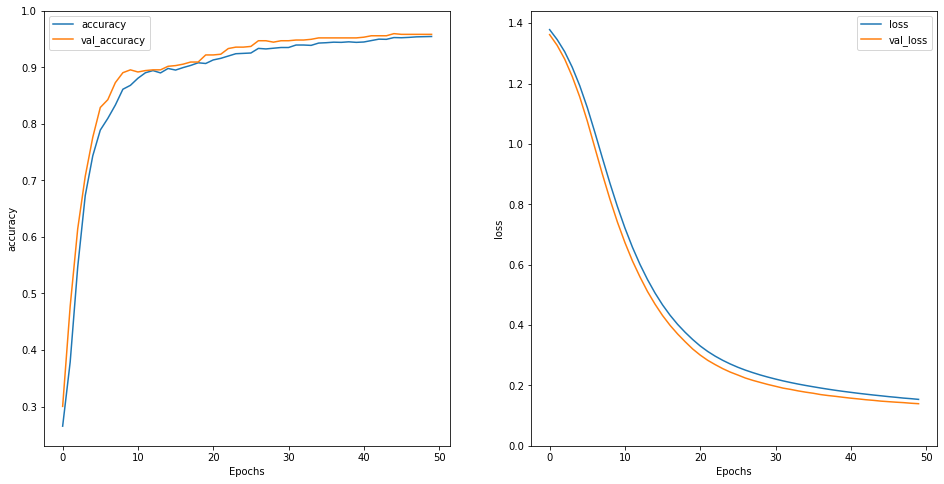

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [24]:
model.save("tf_models/dnn_easy.h5")

## Hard Dataset (Distinct Job Categories)

In [25]:
is_working_with_easy_dataset = False

In [26]:
if is_working_with_easy_dataset:
    input_train_filename = "bag_easy_train.csv"
    input_test_filename = "bag_easy_test.csv"
else:
    input_train_filename = "bag_difficult_train.csv"
    input_test_filename = "bag_difficult_test.csv"

In [27]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [28]:
jd_train

,category,assessment,Management,Work,cyber,ÊÊ,Data,control,design,Experience,...,Technology,role,Java,process,Strong,skill,software,business,Ability,experience
0,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.143276,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.345453,0.000000,0.0,0.323940
1,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.061751,0.0,...,0.0,0.082574,0.0,0.000000,0.0,0.057996,0.000000,0.125683,0.0,0.511923
2,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.290684,0.499494,0.0,...,0.0,0.000000,0.0,0.203606,0.0,0.000000,0.100361,0.000000,0.0,0.062741
3,ui+ux,0.120286,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.160089,0.0,0.073200,0.0,0.112439,0.000000,0.000000,0.0,0.225563
4,ui+ux,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.115759,0.0,0.105860,0.0,0.040652,0.000000,0.000000,0.0,0.097861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.095572,0.054742,0.0,...,0.0,0.109803,0.0,0.066942,0.0,0.179947,0.164985,0.111417,0.0,0.123768
3176,cyber+security,0.000000,0.0,0.0,0.140165,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.210418,0.0,0.000000,0.0,0.221681,0.094849,0.000000,0.0,0.177885
3177,ui+ux,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.422655,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.509533,0.107530,0.0,0.238901
3178,data+analyst,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.026570,0.0,...,0.0,0.071060,0.0,0.064984,0.0,0.124773,0.032032,0.567827,0.0,0.060074


In [29]:
jd_test

,category,assessment,Management,Work,cyber,ÊÊ,Data,control,design,Experience,...,Technology,role,Java,process,Strong,skill,software,business,Ability,experience
0,data+analyst,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.248572,0.000000,0.523485,0.0,0.064633
1,cyber+security,0.0,0.0,0.0,0.175017,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.151252
2,software+engineer,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.102496,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.038436
3,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.147327,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.141651,0.044691,0.335602,0.0,0.110494
4,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.102945,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.148468,0.000000,0.000000,0.0,0.115812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,software+engineer,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.044197,0.0,...,0.0,0.059146,0.0,0.055503,0.0,0.000000,0.107255,0.000000,0.0,0.099442
791,cyber+security,0.0,0.0,0.0,0.000000,0.0,0.0,0.087995,0.050226,0.0,...,0.0,0.000000,0.0,0.126149,0.0,0.048291,0.000000,0.152549,0.0,0.113008
792,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.602373,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.231666,0.000000,0.000000,0.0,0.180710
793,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.388837,0.0,...,0.0,0.000000,0.0,0.162769,0.0,0.000000,0.314537,0.000000,0.0,0.194417


### Splitting Dataset into Features and Target Vectors

In [30]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [31]:
jd_test_y.value_counts()

category         
cyber+security       212
software+engineer    211
ui+ux                200
data+analyst         172
dtype: int64

### Encoding Target Variables

In [32]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [33]:
enc.categories_

[array(['cyber+security', 'data+analyst', 'software+engineer', 'ui+ux'],
       dtype=object)]

In [34]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

### DNN Model creation and training

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [36]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [37]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50
  4/100 [>.............................] - ETA: 1s - loss: 1.4022 - accuracy: 0.2812 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 

2023-03-31 16:53:30.645961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 1.3755 - accuracy: 0.3419 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00

2023-03-31 16:53:32.047590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 2s 16ms/step - loss: 1.3755 - accuracy: 0.3415 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.3641 - val_accuracy: 0.4013 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 1s 13ms/step - loss: 1.3514 - accuracy: 0.4173 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.3390 - val_accuracy: 0.4868 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 1s 13ms/step - loss: 1.3205 - accuracy: 0.5258 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.3056 - val_accuracy: 0.5220 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 1s 13ms/step - loss: 1.2814 - accuracy: 0.5981 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 1.2627 - val_accuracy: 0.6214 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 5/50
100/

### Viewing learning curves

(0.0, 1.4307014986872673)

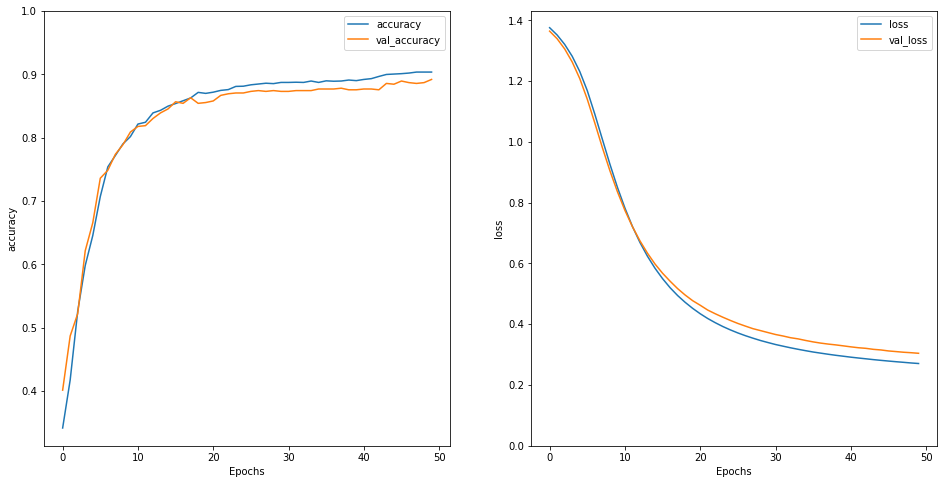

In [38]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [39]:
model.save("tf_models/dnn_hard.h5")